In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
from scipy import stats
import scipy.stats as st
import time


In [2]:
# Read in the cleaned data file
data_final = pd.read_csv("../resources/data_final.csv")
data_final.head()

# NOTE: This data set includes all 50 U.S. states plus the District of Columbia. All references to "states" in this
# code includes all 51 of these states.

,State,Abbreviation,Total Emergency Depts,Total ED Visit Volume,Cases,Deaths,Death Rate (%),Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate (%),Per Capita EDs (100K),Per Capita Cases,Per Capita Deaths,Per Capita Death Rate
0,Alabama,AL,98,"2,825,756",46078611,728745,1.58,4876250,39.0,50536,27928,795989,16.32,2.01,944.96,14.94,1.48
1,Alaska,AK,20,"261,985",4544475,20735,0.46,737068,34.3,77640,36787,76933,10.44,2.71,616.56,2.81,0.32
2,Arizona,AZ,88,"3,119,364",69132576,1418028,2.05,7050299,37.7,58945,30694,1043764,14.80,1.25,980.56,20.11,2.04
3,Arkansas,AR,79,"1,730,571",27248041,428643,1.57,2999370,38.1,47597,26577,496260,16.55,2.63,908.46,14.29,1.54
4,California,CA,341,"15,787,403",271972863,4177868,1.54,39283497,36.5,75235,36955,5149742,13.11,0.87,692.33,10.64,1.45


In [3]:
# Calculate mean and median to determine data distribution
average = data_final["Per Capita EDs (100K)"].mean()
print("Average Emergency Departments Per 100k: ", average)

median_data = data_final["Per Capita EDs (100K)"].median()
print("Median Emergency Departments Per 100k:  ",median_data)
# Mean and median support normal distribution of data

Average Emergency Departments Per 100k:  2.215686274509804
Median Emergency Departments Per 100k:   1.91


In [4]:
# # Calculate critical value for chi squared test of all states
low_critical_value = stats.chi2.ppf(q=0.95, df= 50)
print("The critical value of the Chi square test is ", low_critical_value)

The critical value of the Chi square test is  67.5048065495412


In [5]:
# Run chi squared tests for all states
# Data rejects the null hypothesis - there seems to be a relationship between per capita EDs and COVID-19 death rate
stats.chisquare(data_final["Per Capita EDs (100K)"], data_final["Per Capita Death Rate"])

Power_divergenceResult(statistic=150.63709467468954, pvalue=5.074614374556059e-12)

In [6]:
# Create threshold for ED concentration based on median of per capita EDs
bins = [0, 2.215, 6]
bin_labels = ["Low", "High"]
data_final["Low/High Concentration of EDs (100k)"] = pd.cut(data_final["Per Capita EDs (100K)"], bins, labels=bin_labels)
data_final.head()


,State,Abbreviation,Total Emergency Depts,Total ED Visit Volume,Cases,Deaths,Death Rate (%),Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate (%),Per Capita EDs (100K),Per Capita Cases,Per Capita Deaths,Per Capita Death Rate,Low/High Concentration of EDs (100k)
0,Alabama,AL,98,"2,825,756",46078611,728745,1.58,4876250,39.0,50536,27928,795989,16.32,2.01,944.96,14.94,1.48,Low
1,Alaska,AK,20,"261,985",4544475,20735,0.46,737068,34.3,77640,36787,76933,10.44,2.71,616.56,2.81,0.32,High
2,Arizona,AZ,88,"3,119,364",69132576,1418028,2.05,7050299,37.7,58945,30694,1043764,14.80,1.25,980.56,20.11,2.04,Low
3,Arkansas,AR,79,"1,730,571",27248041,428643,1.57,2999370,38.1,47597,26577,496260,16.55,2.63,908.46,14.29,1.54,High
4,California,CA,341,"15,787,403",271972863,4177868,1.54,39283497,36.5,75235,36955,5149742,13.11,0.87,692.33,10.64,1.45,Low


In [7]:
# Sort data set into two data frames based on threshold - "low" concetration state and "high" concentration states
low_concentration = data_final.loc[data_final["Low/High Concentration of EDs (100k)"] == "Low"]
print("Number of low concentration states: ", len(low_concentration))
low_concentration.head()

Number of low concentration states:  30


,State,Abbreviation,Total Emergency Depts,Total ED Visit Volume,Cases,Deaths,Death Rate (%),Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate (%),Per Capita EDs (100K),Per Capita Cases,Per Capita Deaths,Per Capita Death Rate,Low/High Concentration of EDs (100k)
0,Alabama,AL,98,"2,825,756",46078611,728745,1.58,4876250,39.0,50536,27928,795989,16.32,2.01,944.96,14.94,1.48,Low
2,Arizona,AZ,88,"3,119,364",69132576,1418028,2.05,7050299,37.7,58945,30694,1043764,14.80,1.25,980.56,20.11,2.04,Low
4,California,CA,341,"15,787,403",271972863,4177868,1.54,39283497,36.5,75235,36955,5149742,13.11,0.87,692.33,10.64,1.45,Low
6,Connecticut,CT,35,"1,666,267",24625667,1338181,5.43,3575074,41.0,78444,44496,344146,9.63,0.98,688.82,37.43,5.38,Low
7,Delaware,DE,11,"523,043",7447062,179045,2.40,957248,40.6,68287,35450,109400,11.43,1.15,777.97,18.70,2.32,Low


In [8]:
# Calculate critical value for chi squared test of low concentration states
low_critical_value = stats.chi2.ppf(q=0.95, df= 29)
print("The critical value of the Chi square test is ", low_critical_value)

The critical value of the Chi square test is  42.55696780429269


In [9]:
# Run chi squared tests for low concentration states
# Data does not reject the null hypothesis - no relationship between ED concentration and COVID death rates in low conentration states
stats.chisquare(low_concentration["Per Capita EDs (100K)"], low_concentration["Per Capita Death Rate"])

Power_divergenceResult(statistic=27.52753979524908, pvalue=0.5432658100648736)

In [10]:
# Create the high concetration of EDs data frame
high_concentration = data_final.loc[data_final["Low/High Concentration of EDs (100k)"] == "High"]
print("Number of high concentration states: ", len(high_concentration))
high_concentration.head()

Number of high concentration states:  21


,State,Abbreviation,Total Emergency Depts,Total ED Visit Volume,Cases,Deaths,Death Rate (%),Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate (%),Per Capita EDs (100K),Per Capita Cases,Per Capita Deaths,Per Capita Death Rate,Low/High Concentration of EDs (100k)
1,Alaska,AK,20,"261,985",4544475,20735,0.46,737068,34.3,77640,36787,76933,10.44,2.71,616.56,2.81,0.32,High
3,Arkansas,AR,79,"1,730,571",27248041,428643,1.57,2999370,38.1,47597,26577,496260,16.55,2.63,908.46,14.29,1.54,High
5,Colorado,CO,131,"2,515,825",35779317,721293,2.02,5610349,36.7,72331,38226,565873,10.09,2.33,637.74,12.86,1.88,High
12,Idaho,ID,42,"649,169",15705246,162163,1.03,1717750,36.4,55785,27970,221256,12.88,2.45,914.29,9.44,0.98,High
15,Iowa,IA,119,"1,488,702",33310004,478668,1.44,3139508,38.2,60523,32176,348122,11.09,3.79,1060.99,15.25,1.42,High


In [11]:
# Calculate critical value for chi squared test of high concentration states
high_critical_value = stats.chi2.ppf(q=0.95, df= 20)
print("The critical value of the Chi square test is ", high_critical_value)

The critical value of the Chi square test is  31.410432844230918


In [12]:
# Run chi squared tests for high concentration states
# Data rejects the null hypothesis - a relationship between ED concentration and COVID death rates in high conentration states exists
stats.chisquare(high_concentration["Per Capita EDs (100K)"], high_concentration["Per Capita Death Rate"])

Power_divergenceResult(statistic=123.10955487944042, pvalue=7.550714959382525e-17)

In [13]:
## ANALYSIS:
# The data suggests there is a threshold at which the concentration of emergency departments within a state has an impact on
# COVID-19 death rates. We do not have enough data to determine where that threshold begins.

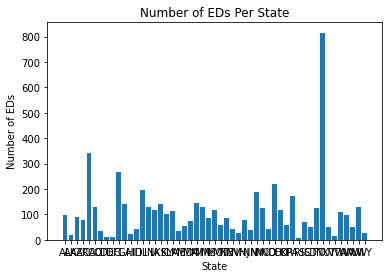

In [14]:
# Create bar graph of raw number of EDs per state
x_axis = data_final["Abbreviation"]
y_axis = data_final["Total Emergency Depts"]
plt.bar(x_axis, y_axis)
plt.title("Number of EDs Per State")
plt.xlabel("State")
plt.ylabel("Number of EDs")
plt.savefig("Number of EDs Per State Bar Graph.png")
plt.show()

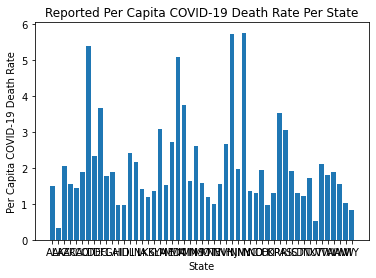

In [15]:
# Create bar graph of per capita COVID-19 death rate per state
x_axis = data_final["Abbreviation"]
y_axis = data_final["Per Capita Death Rate"]
plt.bar(x_axis, y_axis)
plt.title("Reported Per Capita COVID-19 Death Rate Per State")
plt.xlabel("State")
plt.ylabel("Per Capita COVID-19 Death Rate")
plt.savefig("Reported Per Capita COVID-19 Death Rate Per State Bar Graph.png")
plt.show()

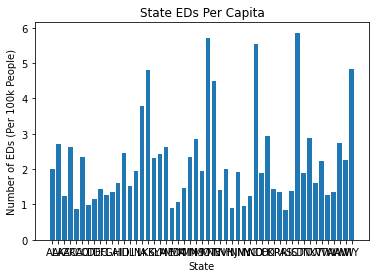

In [16]:
# Create bar graph of per capita EDs per state
x_axis = data_final["Abbreviation"]
y_axis = data_final["Per Capita EDs (100K)"]
plt.title("State EDs Per Capita")
plt.xlabel("State")
plt.ylabel("Number of EDs (Per 100k People)")
plt.bar(x_axis, y_axis)
plt.savefig("State EDs Per Capita.png")
plt.show()

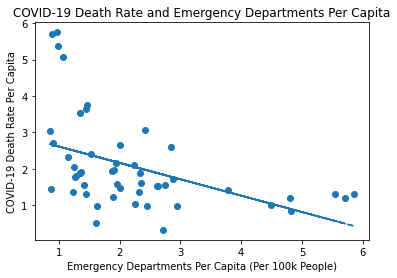

The correlation coefficient between EDs per capita and COVID-19 death rates per capita is -0.46


In [17]:
# Create scatter plot of per capita EDs vs per capita deaths
x_axis = data_final["Per Capita EDs (100K)"]
y_axis = data_final["Per Capita Death Rate"]
plt.title("COVID-19 Death Rate and Emergency Departments Per Capita")
plt.xlabel("Emergency Departments Per Capita (Per 100k People)")
plt.ylabel("COVID-19 Death Rate Per Capita")
plt.scatter(x_axis, y_axis)
# Perform a linear regression on Per Capita EDs versus Per Capita Deaths
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x_axis, y_axis)
# Create equation of line to calculate predicted Per Capita Deaths
vc_fit = vc_slope * x_axis + vc_int
plt.plot(x_axis, vc_fit, "--")
plt.savefig("COVID-19 Death Rate and Emergency Departments Per Capita.png")
plt.show()
#Show results
print(f"The correlation coefficient between EDs per capita and COVID-19 death rates per capita is {round(st.pearsonr(x_axis,y_axis)[0],2)}")


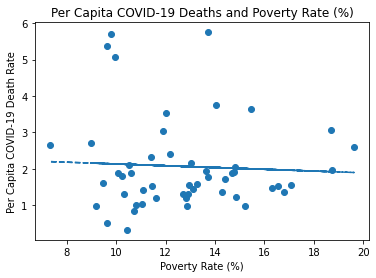

The correlation coefficient between Poverty Rate and COVID-19 death rates per capita is -0.05


In [18]:
# Create a scatter plot of poverty rate vs per capita death rate
x_axis = data_final["Poverty Rate (%)"]
y_axis = data_final["Per Capita Death Rate"]
# Perform a linear regression on Poverty Rate versus Deaths Per Capita
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x_axis, y_axis)
# Create equation of line to calculate predicted Deaths Per Capita
vc_fit = vc_slope * x_axis + vc_int
plt.plot(x_axis, vc_fit, "--")
plt.title("Per Capita COVID-19 Deaths and Poverty Rate (%)")
plt.xlabel("Poverty Rate (%)")
plt.ylabel("Per Capita COVID-19 Death Rate")
plt.scatter(x_axis, y_axis)
plt.savefig("Per Capita COVID-19 Deaths and Poverty Rate (%).png")
plt.show()
#Show results
print(f"The correlation coefficient between Poverty Rate and COVID-19 death rates per capita is {round(st.pearsonr(x_axis,y_axis)[0],2)}")


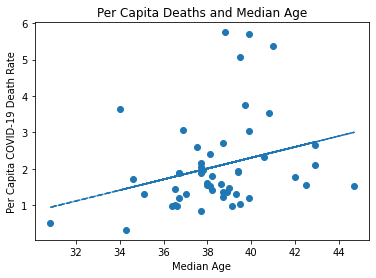

The correlation coefficient between Median Age and COVID-19 death rates per capita is 0.29


In [19]:
# Create a scatter plot of median age vs per capita death rate
x_axis = data_final["Median Age"]
y_axis = data_final["Per Capita Death Rate"]
plt.title("Per Capita Deaths and Median Age")
plt.xlabel("Median Age")
plt.ylabel("Per Capita COVID-19 Death Rate")
plt.scatter(x_axis, y_axis)
 # Perform a linear regression on year Median Age versus Deaths Per Capita  
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x_axis, y_axis)
# Create equation of line to calculate predicted Deaths Per Capita 
vc_fit = vc_slope * x_axis + vc_int
plt.plot(x_axis, vc_fit, "--")
plt.savefig("Per Capita Deaths and Median Age.png")
plt.show()
#Show results
print(f"The correlation coefficient between Median Age and COVID-19 death rates per capita is {round(st.pearsonr(x_axis,y_axis)[0],2)}")


In [20]:
# quartiles = data_final["Per Capita Deaths"].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of Deaths Per 100k is: {lowerq}")
# print(f"The upper quartile of Deaths Per 100k is: {upperq}")
# print(f"The interquartile range of Deaths Per 100k is: {iqr}")
# print(f"The the median of Deaths Per 100k is: {quartiles[0.5]} ")

# #since te lower bound is below 0, the lower bound is automically set to 0 
# #since it would be impossible to have a Death Per Capita rate below 0

# #lower_bound = lowerq - (1.5*iqr)
# lower_bound = 0
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")


In [21]:
# show_outliers = data_final.loc[data_final["Per Capita Deaths"] > upper_bound]
# show_outliers.head()

In [22]:
# remove_outliers = data_final.loc[data_final["Per Capita Deaths"] < upper_bound]
# remove_outliers.head()

In [23]:
# x_axis = remove_outliers["Per Capita EDs (100K)"]
# y_axis = remove_outliers["Per Capita Deaths"]
# plt.title("Deaths and Emergency Departments Per Capita")
# plt.xlabel("Emergency Departments Per Capita (Per 100k People)")
# plt.ylabel("Deaths Per Capita")
# plt.scatter(x_axis, y_axis)
# # Perform a linear regression on Per Capita EDs versus Per Capita Deaths
# vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x_axis, y_axis)
# # Create equation of line to calculate predicted Per Capita Deaths
# vc_fit = vc_slope * x_axis + vc_int
# plt.plot(x_axis, vc_fit, "--")
# plt.show()
# #Show results
# print(f"The correlation coefficient between Emergency Departments Per Capita and Deaths Per Capita after removing the outliers and is {round(st.pearsonr(x_axis,y_axis)[0],2)}")